# Funciones de distribucion de probabilidades 

## Distribucion uniforme

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
a = 1
b = 100
n = 1000000
data = np.random.uniform(a,b,n)

(array([100167., 100179.,  99885.,  99822., 100599.,  99756.,  99947.,
         99873.,  99981.,  99791.]),
 array([ 1.00015221, 10.90011369, 20.80007517, 30.70003665, 40.59999812,
        50.4999596 , 60.39992108, 70.29988256, 80.19984404, 90.09980551,
        99.99976699]),
 <a list of 10 Patch objects>)

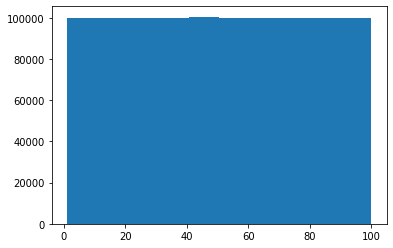

In [3]:
%matplotlib inline
plt.hist(data)

## Distribucion normal 

In [4]:
data2 = np.random.randn(1000000)
data2

array([-0.81564158,  0.9151334 , -0.96328992, ..., -0.16082044,
        1.07231067,  0.64589219])

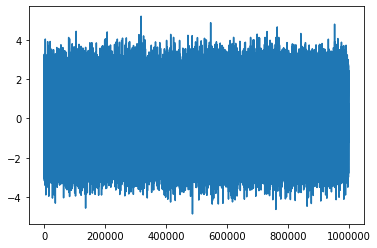

In [5]:
x = range(1,1000001)
plt.plot(x,data2)

(array([7.30000e+01, 2.12000e+03, 3.04310e+04, 1.69741e+05, 3.66582e+05,
        3.12056e+05, 1.04582e+05, 1.36780e+04, 7.22000e+02, 1.50000e+01]),
 array([-4.86339547, -3.85586915, -2.84834283, -1.8408165 , -0.83329018,
         0.17423614,  1.18176246,  2.18928879,  3.19681511,  4.20434143,
         5.21186775]),
 <a list of 10 Patch objects>)

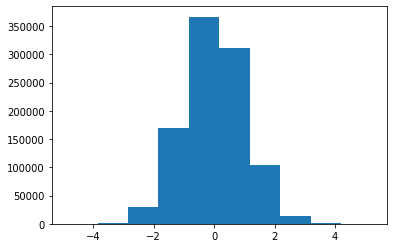

In [6]:
plt.hist(data2)

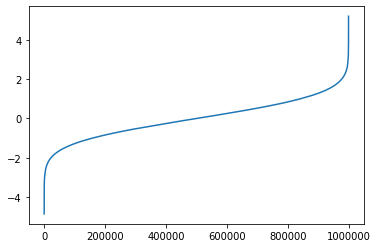

In [7]:
plt.plot(x,sorted(data2))

(array([   6.,   34.,  275., 1081., 2371., 3001., 2135.,  856.,  207.,
          34.]),
 array([-4.80068577, -2.89169541, -0.98270505,  0.92628532,  2.83527568,
         4.74426605,  6.65325641,  8.56224677, 10.47123714, 12.3802275 ,
        14.28921787]),
 <a list of 10 Patch objects>)

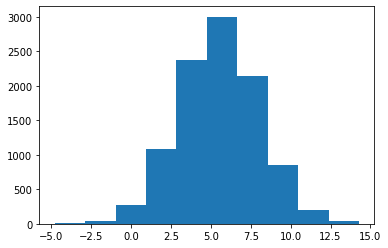

In [8]:
mu = 5.5
sd = 2.5
z =  np.random.randn(10000)
data3 = mu + sd * z # z = (x - mu) / sd --> N(0,1) despejando x : x = mu + sd * z 
plt.hist(data3)

In [9]:
data4 = np.random.randn(2,4) # el primer parametro es la cantidad de muestras(2 vectores ) y el segundo la cantidad elemntos
data4

array([[ 2.15222948, -1.62050094,  0.15534673,  0.69945591],
       [-0.10722186,  1.77089971, -0.27634885, -1.00265561]])

# La simulacion de Monte Carlo

* Generamos dos números aleatorios uniforme x e y entre 0 y 1 en total 1000 veces.
* Calcularemos $z = x^2 + y^2$ ("esta es la formula de la distancia entre dos cordenadas"):
    * Si $z < 1 \rightarrow$ estamos dentro del círculo.
    * Si $z \geq 1 \rightarrow$ estamos fuera del círculo.
* Calculamos el número total de veces que están dentro del círculo y lo dividimos entre el número total de intentos para obtener una aproximación de la probabilidad de caer dentro del círculo.
* Usamos dicha probabilidad para aproximar el valor de π.
* Repetimos el experimento un número suficiente de veces (por ejemplo 100), para obtener (100) diferentes aproximaciones de π. 
* Calculamos el promedio de los 100 experimentos anteriores para dar un valor final de π.
     

In [10]:
def pi_montecarlo(n,n_exp):
    pi_avg = 0
    pi_values_list = []
    for i in range(n_exp):
        value = 0
        x = np.random.uniform(0,1,n).tolist()
        y = np.random.uniform(0,1,n).tolist()
        for j in range(n):
            z = np.sqrt(x[j] * x[j] + y[j] * y[j])
            if z <=1:
                value += 1
        float_value = float(value)
        pi_value = float_value * 4 / n
        pi_values_list.append(pi_value)
        pi_avg += pi_value
    pi = pi_avg/n_exp
    print(pi)
    figura = plt.plot(pi_values_list)
    return(pi , figura)

3.139813999999997


(3.139813999999997, [<matplotlib.lines.Line2D at 0x24552df3748>])

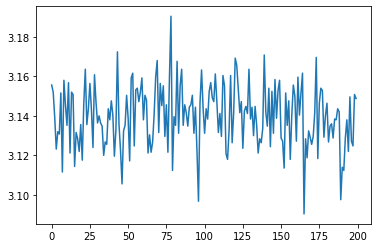

In [11]:
pi_montecarlo(10000,200)

# Dummy Data Sets

In [12]:
n_muestras = 1000000
data5 = pd.DataFrame(
    {
        'A' : np.random.randn(n_muestras),
        'B' : 1.5 + 2.5 * np.random.randn(n_muestras),
        'C' : np.random.uniform(5,32,n_muestras)
    }
)

In [13]:
data5.describe()

,A,B,C
count,1000000.000000,1000000.000000,1000000.000000
mean,0.000826,1.502935,18.514592
std,1.000148,2.502661,7.794438
min,-4.673301,-10.314188,5.000027
25%,-0.673405,-0.185946,11.765811
50%,0.001147,1.506577,18.529848
75%,0.675503,3.193113,25.262802
max,4.906681,13.102718,31.999946


(array([9.70000e+01, 2.80000e+03, 3.30400e+04, 1.64001e+05, 3.45941e+05,
        3.12704e+05, 1.20311e+05, 1.97390e+04, 1.32800e+03, 3.90000e+01]),
 array([-4.67330106, -3.71530287, -2.75730468, -1.79930648, -0.84130829,
         0.11668991,  1.0746881 ,  2.0326863 ,  2.99068449,  3.94868268,
         4.90668088]),
 <a list of 10 Patch objects>)

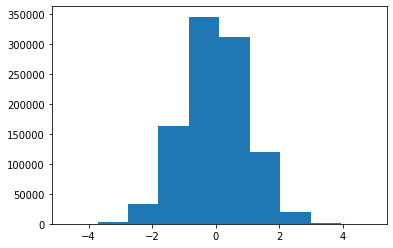

In [14]:
plt.hist(data5["A"])

(array([8.10000e+01, 2.10100e+03, 2.57160e+04, 1.35871e+05, 3.18318e+05,
        3.31536e+05, 1.52772e+05, 3.07710e+04, 2.73300e+03, 1.01000e+02]),
 array([-10.31418812,  -7.97249749,  -5.63080687,  -3.28911624,
         -0.94742562,   1.39426501,   3.73595563,   6.07764625,
          8.41933688,  10.7610275 ,  13.10271813]),
 <a list of 10 Patch objects>)

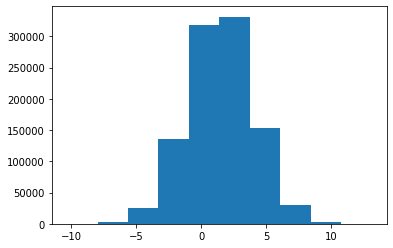

In [15]:
plt.hist(data5["B"])

(array([ 99976.,  99253., 100334.,  99636.,  99667., 100499., 100026.,
        100031., 100349., 100229.]),
 array([ 5.00002706,  7.70001899, 10.40001092, 13.10000285, 15.79999478,
        18.49998671, 21.19997864, 23.89997057, 26.5999625 , 29.29995443,
        31.99994636]),
 <a list of 10 Patch objects>)

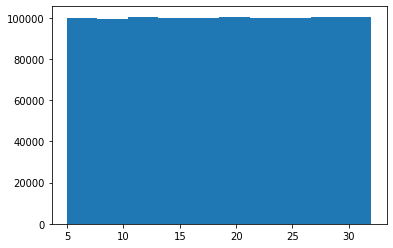

In [16]:
plt.hist(data5["C"])

In [17]:
data6 = pd.read_csv("python-ml-course/datasets/customer-churn-model/Customer Churn Model.txt")

In [18]:
data6.head()

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


In [19]:
colum_names = data6.columns.values.tolist()

In [20]:
a = len(colum_names)

In [21]:
new_data = pd.DataFrame(
    {
        'Column Name' : colum_names,
        'A' : np.random.randn(a),
        'B' : np.random.uniform(0,1,a)
    }
)

In [22]:
new_data

,Column Name,A,B
0,State,0.514087,0.640633
1,Account Length,-0.363026,0.943164
2,Area Code,0.049626,0.978234
3,Phone,-0.348475,0.319515
4,Int'l Plan,-0.617775,0.215776
5,VMail Plan,0.919556,0.149968
6,VMail Message,1.098893,0.474869
7,Day Mins,-1.013198,0.087431
8,Day Calls,-0.575136,0.747063
9,Day Charge,0.910075,0.732757
